In [26]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
import plotly.express as px
import folium
from folium import plugins
from folium.plugins import HeatMap

#Datetime
from datetime import datetime

%matplotlib inline

In [3]:
# Open Dataset
path = r"C:\Users\Tejas Javare\Desktop\Tejas_Oasis\Project 3\AB_NYC_2019.csv"
df = pd.read_csv(path)
# First view to understand how the data is organized
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


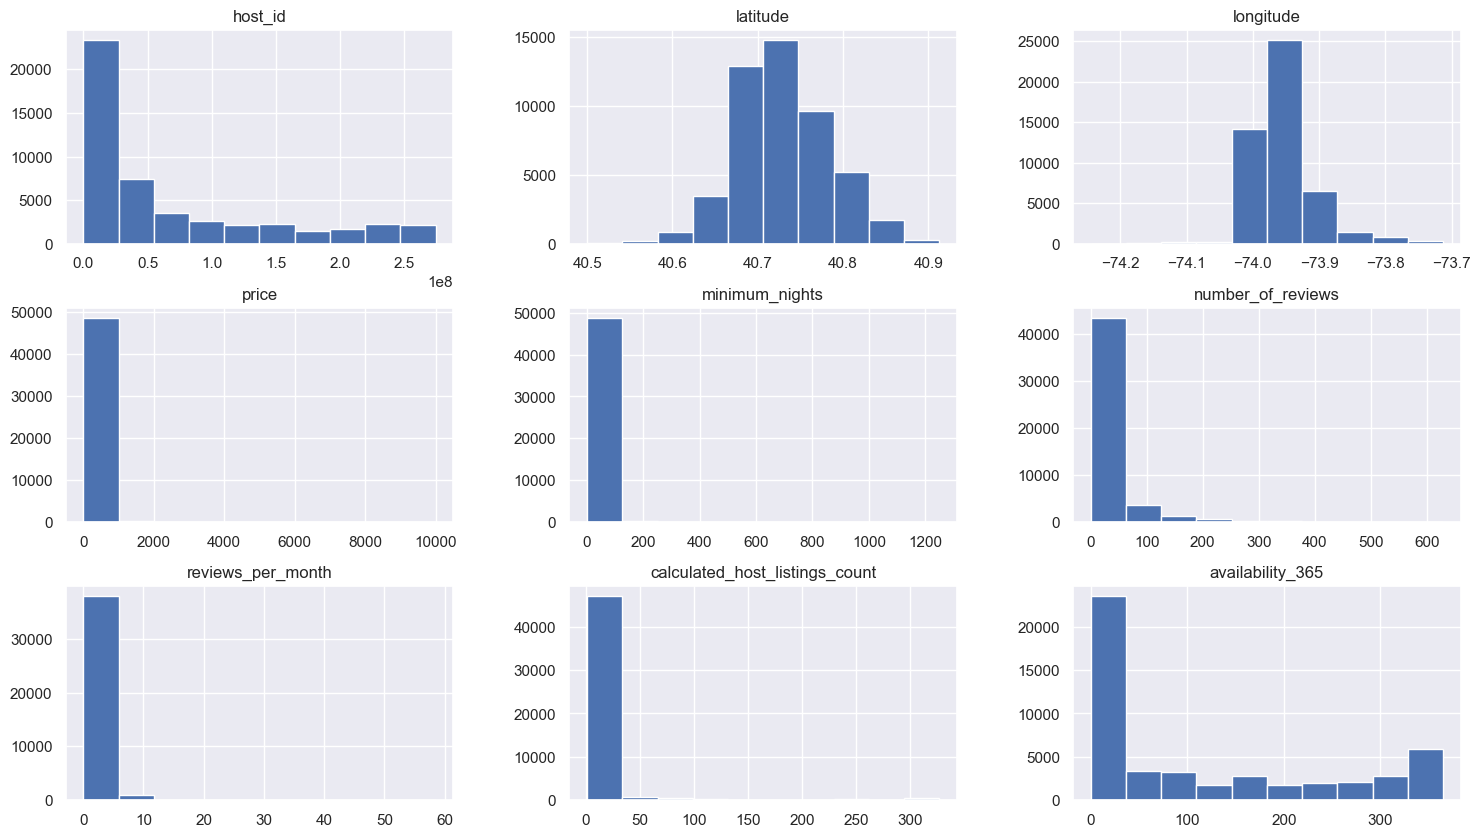

In [4]:
df.drop(['id'],axis=1).hist(figsize=(18,10))
plt.show()

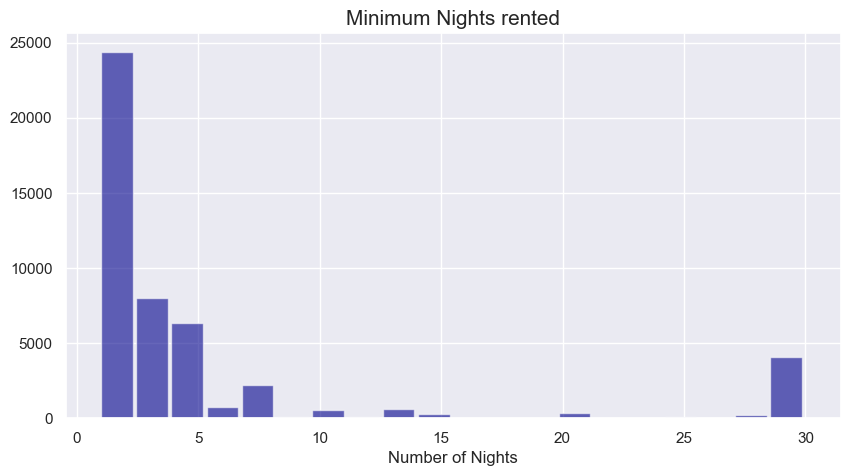

In [5]:
# Countplot minimum_nights
df.minimum_nights[df.minimum_nights<=30].hist(bins = 20, alpha=0.6, width=1.3, figsize=(10,5), color='darkblue')
plt.title('Minimum Nights rented', size=15)
plt.xlabel('Number of Nights')
plt.show()

C:\Users\Tejas Javare\AppData\Local\Temp\ipykernel_20144\3132354728.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'], color = 'green', ax=axs[0])
C:\Users\Tejas Javare\AppData\Local\Temp\ipykernel_20144\3132354728.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.price[df.pr

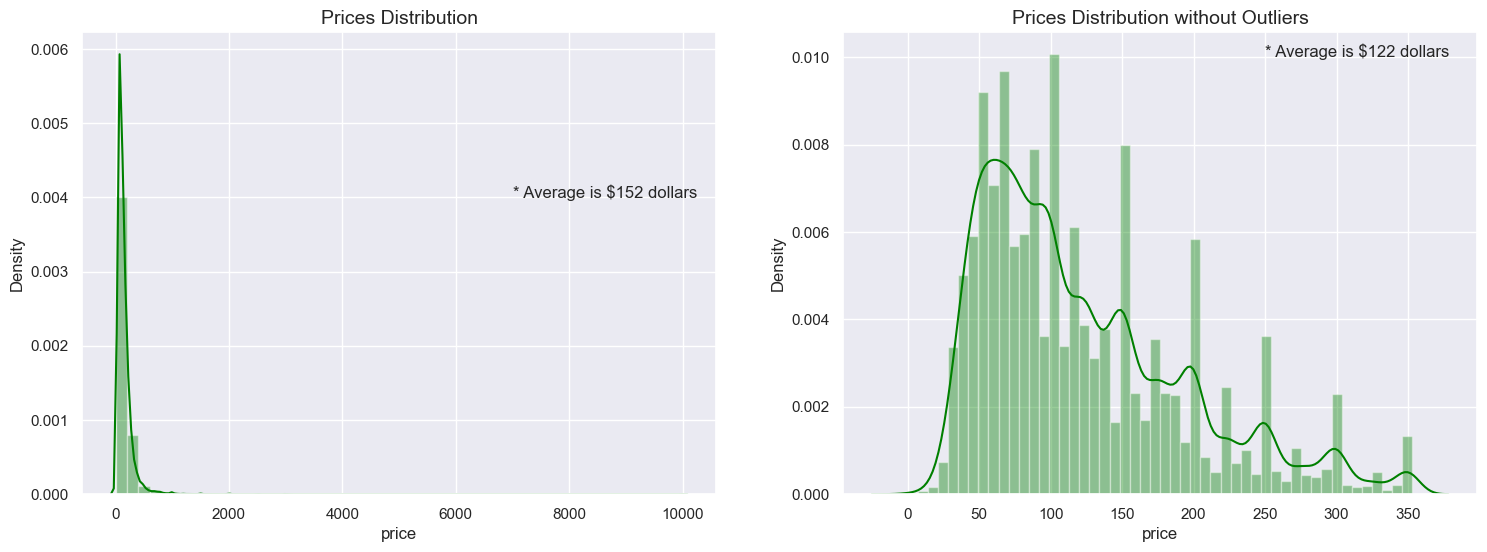

In [6]:
# Price average
fig, axs = plt.subplots(ncols=2, figsize=(18,6))

#Plot without filtering
sns.distplot(df['price'], color = 'green', ax=axs[0])
axs[0].set_title('Prices Distribution', size=14)
axs[0].text(7000,0.004,'* Average is $152 dollars', size=12)

# Plot with Filter
q = df.price.quantile(.95)
sns.distplot(df.price[df.price<q], color = 'green', ax=axs[1])
axs[1].set_title('Prices Distribution without Outliers', size=14)
axs[1].text(250,0.01,'* Average is $122 dollars', size=12)

plt.show()

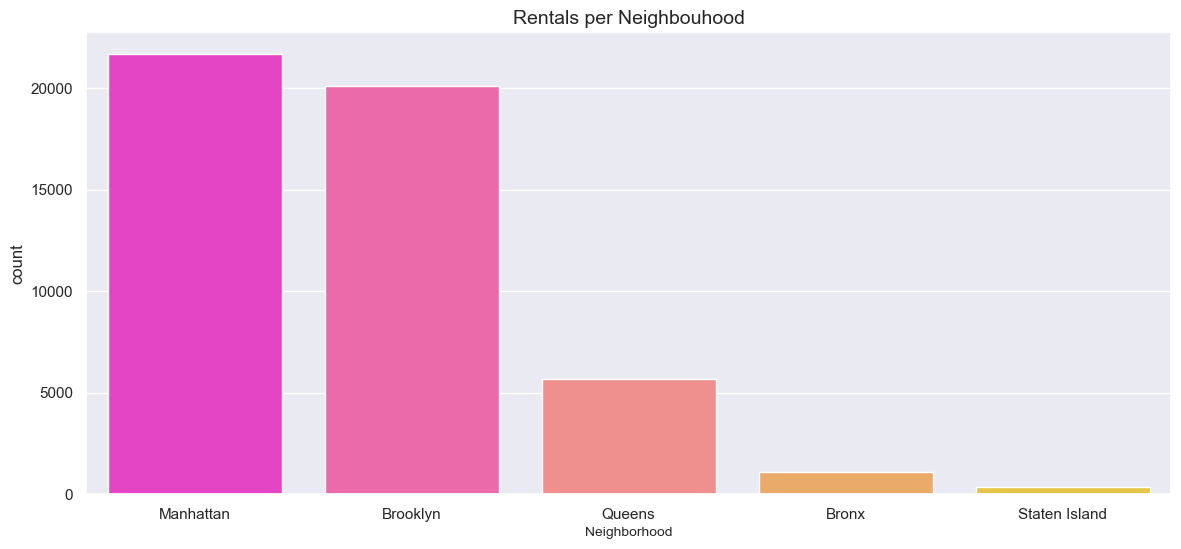

In [8]:
# Where are the most looked neighbourhoods
plt.figure(figsize=(14,6))
g = sns.countplot(x = 'neighbourhood_group', data = df, palette = 'spring',
                  order=df['neighbourhood_group'].value_counts().index)
plt.xlabel("Neighborhood",fontdict= {'size':10})
plt.title("Rentals per Neighbouhood", size=14)
plt.show()

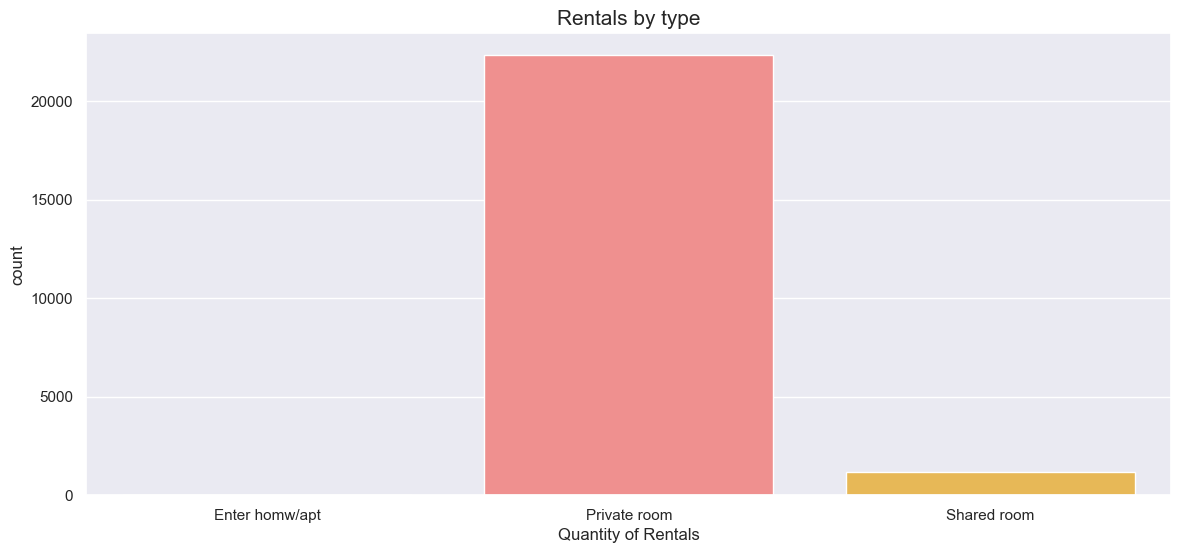

In [16]:
#Type of listings
plt.figure(figsize=(14,6)) 
g=sns. countplot(x = 'room_type', data = df, palette='spring',
                order =['Enter homw/apt', 'Private room', 'Shared room'])
plt.xlabel("Rom Type", fontdict={'size':10})
plt.xlabel("Quantity of Rentals", fontdict={'size':12})
plt.title("Rentals by type", size=15)
plt.show()

In [19]:
# Create a subset of the dataset with the top 50 renters
index = df.groupby('host_id').id.count().sort_values(ascending=False).head(50).index
df_top50 = df[df.host_id.isin(index)].reset_index()

# Create a function to add a marker to the map
def add_marker(lat, lon, text):
    return folium.CircleMarker(location=[lat, lon],
                               radius=3,
                               color='black',
                               popup=text).add_to(m)

# Creating the base map, initializing it over Manhattan and adding the points
m = folium.Map(location=[40.75, -73.97], zoom_start=13)
for i in range(len(df_top50)):
    add_marker(df_top50.latitude[i], df_top50.longitude[i],str(df_top50.price[i])+'USD')

# Adding the Heat Map 
data_loc= df_top50[['latitude','longitude', 'price']].values
data_loc =data_loc.tolist()
hm = plugins.HeatMap(data_loc)
hm.add_to(m)

m

In [23]:
# 1. Duplicate Removal
df_no_duplicates = df.drop_duplicates()

In [27]:
# 3. Outlier Detection using Isolation Forest
# Assuming 'price' column contains numerical values to be checked for outliers
X = df_no_duplicates[['price']]
clf = IsolationForest(contamination=0.1, random_state=42)
df_no_duplicates['Outlier'] = clf.fit_predict(X)

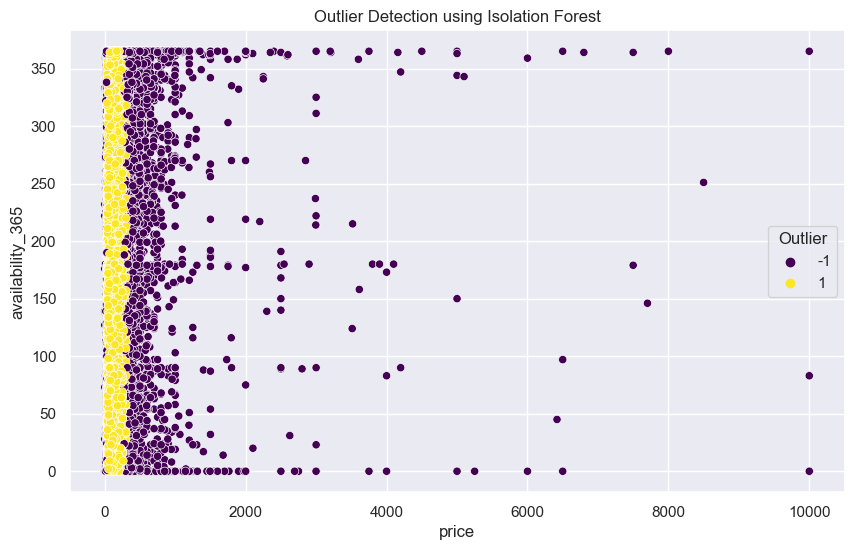

In [28]:
# Visualize Outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_no_duplicates, x='price', y='availability_365', hue='Outlier', palette='viridis')
plt.title('Outlier Detection using Isolation Forest')
plt.show()

In [29]:
# Remove Outliers
df_no_outliers = df_no_duplicates[df_no_duplicates['Outlier'] != -1]


In [30]:
# Display Results
print("Original DataFrame:")
print(df)
print("\nDataFrame after Duplicate Removal:")
print(df_no_duplicates)
print("\nDataFrame after Outlier Removal:")
print(df_no_outliers)

Original DataFrame:
             id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

           host_nam